In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score


     x         y
0  1.0  1.750768
1  1.1  1.699704
2  1.2  1.607502
3  1.3  1.479060
4  1.4  1.320438


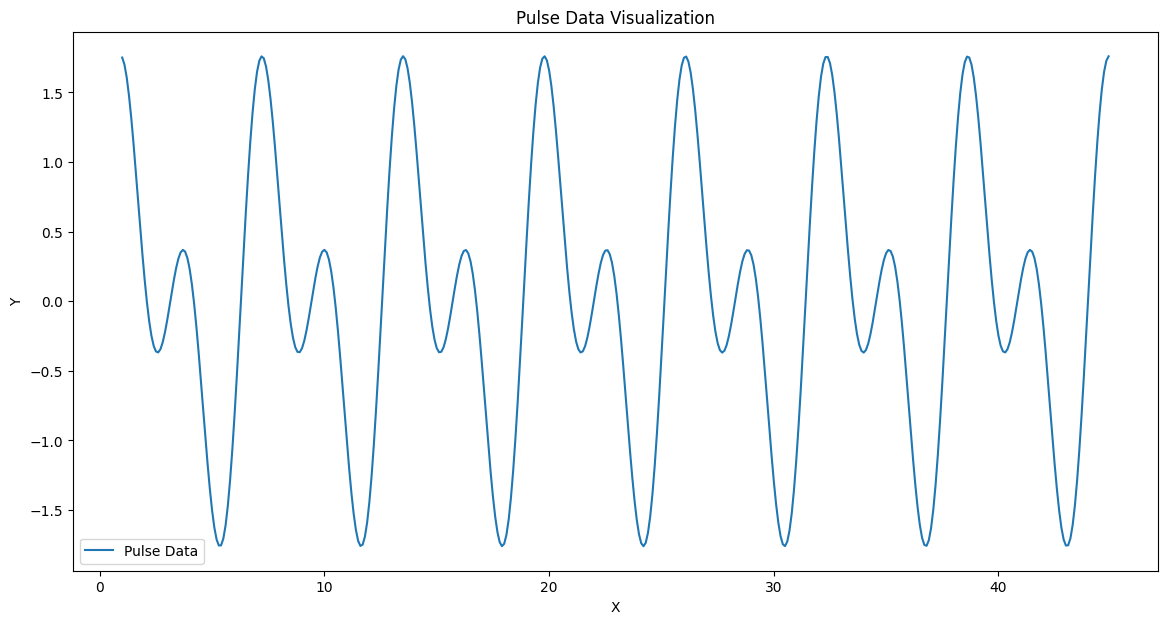

In [2]:

# Load the data from the CSV file
df = pd.read_csv('scr-dataset.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(df['x'], df['y'], label='Pulse Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pulse Data Visualization')
plt.legend()
plt.show()


In [3]:

# Extract the columns
x_data = df['x'].values
y_data = df['y'].values

# Reshape the data
y_data = y_data.reshape(-1, 1)


In [4]:

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler.fit_transform(y_data)

look_back = 10
X, Y = create_dataset(x_data, y_scaled, look_back)

# Reshape X to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [14]:

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X, Y, epochs=100, batch_size=1, verbose=2)


Epoch 1/100


c:\Users\shreeya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


430/430 - 2s - 5ms/step - loss: 0.0329
Epoch 2/100
430/430 - 1s - 2ms/step - loss: 0.0032
Epoch 3/100
430/430 - 1s - 2ms/step - loss: 0.0025
Epoch 4/100
430/430 - 1s - 2ms/step - loss: 0.0017
Epoch 5/100
430/430 - 1s - 2ms/step - loss: 0.0010
Epoch 6/100
430/430 - 1s - 2ms/step - loss: 4.8987e-04
Epoch 7/100
430/430 - 1s - 2ms/step - loss: 2.1876e-04
Epoch 8/100
430/430 - 1s - 2ms/step - loss: 6.4764e-05
Epoch 9/100
430/430 - 1s - 2ms/step - loss: 4.9769e-05
Epoch 10/100
430/430 - 1s - 2ms/step - loss: 2.4437e-05
Epoch 11/100
430/430 - 1s - 2ms/step - loss: 2.3966e-04
Epoch 12/100
430/430 - 1s - 2ms/step - loss: 4.3471e-05
Epoch 13/100
430/430 - 1s - 2ms/step - loss: 9.5870e-05
Epoch 14/100
430/430 - 1s - 2ms/step - loss: 5.0962e-04
Epoch 15/100
430/430 - 1s - 2ms/step - loss: 1.0136e-05
Epoch 16/100
430/430 - 1s - 2ms/step - loss: 1.5340e-05
Epoch 17/100
430/430 - 1s - 2ms/step - loss: 6.6797e-05
Epoch 18/100
430/430 - 1s - 2ms/step - loss: 2.5301e-04
Epoch 19/100
430/430 - 1s - 2ms/s

In [15]:

# Prepare the input for prediction
x_pred = np.arange(45, 50.1, 0.1)
predictions = []

for i in range(len(x_pred)):
    y_pred_input = y_data[-look_back:].reshape(-1, 1)
    y_pred_input = scaler.transform(y_pred_input)
    y_pred_input = np.reshape(y_pred_input, (1, look_back, 1))
    
    # Predict the pulse
    y_pred_scaled = model.predict(y_pred_input)
    y_pred = scaler.inverse_transform(y_pred_scaled)
    
    # Append prediction to the list
    predictions.append(y_pred[0][0])
    
    # Update the y_data with the new prediction
    y_data = np.append(y_data, y_pred[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━

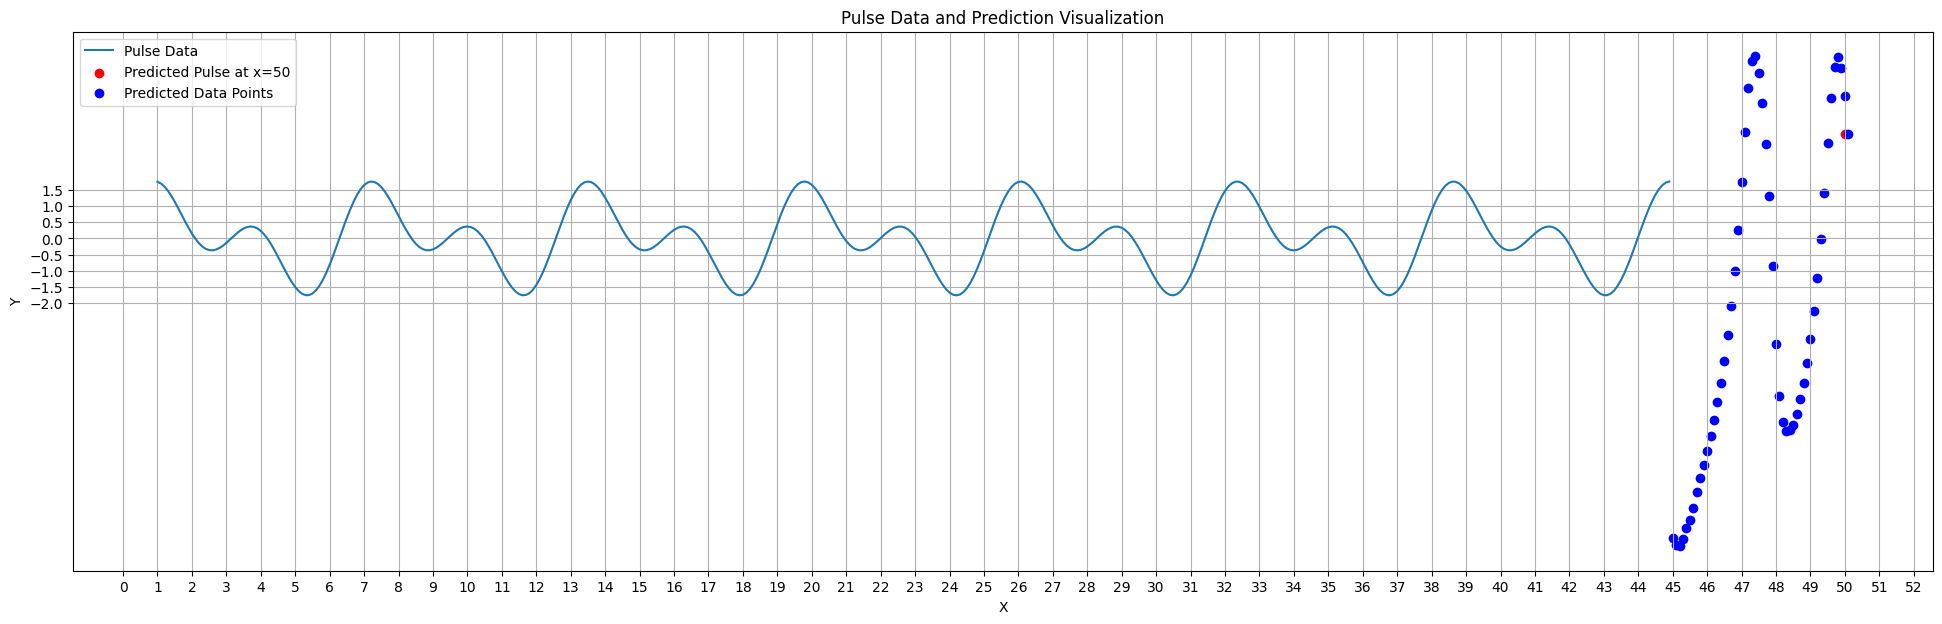

The predicted pulse y at x=50 is: 3.244192361831665


In [17]:

# Plot the results
plt.figure(figsize=(24, 7))
plt.plot(df['x'], df['y'], label='Pulse Data')
plt.xticks(np.arange(0, 60, step=1))
plt.yticks(np.arange(-2, 2, step=0.5))
plt.scatter([50], [predictions[-1]], color='red', label='Predicted Pulse at x=50')
plt.scatter(x_pred, predictions, color='blue', label='Predicted Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pulse Data and Prediction Visualization')
plt.legend()
plt.grid()
plt.show()

# Print the predicted pulse at x=50
print(f'The predicted pulse y at x=50 is: {predictions[-1]}')
